Dyslexia is a common learning disorder that affects reading, writing, and spelling abilities, often leading to challenges in academic and daily life. Accurate and early identification of dyslexia is critical for implementing effective interventions and support strategies. To address this need, the [DSTJ (Dyslexia Screening Test for Juniors)] has been developed as a standardized instrument for evaluating dyslexia in children. However, the effectiveness and validity of such tools need thorough testing in varied populations to ensure their reliability and accuracy.

This analysis that I did aims to evaluate the validity of the DSTJ instrument in assessing dyslexia among a sample of 30 boys of whom have been previously diagnosed with dyslexia and 60 without any reported dyslexia. By comparing the results obtained from the DSTJ across these two groups, we seek to determine its ability to distinguish between individuals with and without dyslexia, as well as its potential application as a reliable diagnostic tool.

Our analysis focuses on statistical measures of validity, such as t-test and effect size measures and overall predictive accuracy, to provide insights into the DSTJ’s effectiveness.

In [111]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

For analysis we had two samples:
Sample of 30 male dyslexics children and sample of 60 male non-dyslexics children.

In [112]:
df_diskl = pd.read_excel('baza_za_30_disleksicnih_prava.xls',header=1,index_col=0)
df_diskl.rename(columns={'Unnamed: 87': 'ARQ', 'Unnamed: 88': 'Diagnosis'}, inplace=True)
df_diskl.head()

,Pol,Uzrast (u mesecima),Uzrasna grupa,Razred,Škola,Vreme (s),Broj grešaka,Korišćenje papira,Skor,At Risk Index,...,11.1,12.1,13,14,15,16,Skor.10,At Risk Index.12,ARQ,Diagnosis
1,1,129,5,NaN,zavod,56,0,0,56,5,...,1,1,1,0,1,1,13,3,"2,09",4
2,1,94,2,NaN,zavod,54,0,0,54,3,...,1,1,0,0,1,1,14,2,"1,54",4
3,1,131,5,NaN,zavod,41,0,0,41,3,...,1,1,0,0,1,1,13,3,"1,18",4
4,1,110,2,NaN,zavod,56,0,0,56,5,...,1,1,0,0,1,1,13,3,2.27,4
5,1,105,3,NaN,zavod,40,0,0,40,2,...,1,1,0,1,1,0,13,2,"1,18",4


In [113]:
df = pd.read_excel('Baza dečaci bez disleksija.xlsx',index_col=0)
df.columns = df_diskl.columns
df.head()

,Pol,Uzrast (u mesecima),Uzrasna grupa,Razred,Škola,Vreme (s),Broj grešaka,Korišćenje papira,Skor,At Risk Index,...,11.1,12.1,13,14,15,16,Skor.10,At Risk Index.12,ARQ,Diagnosis
ID 137,,,,,,,,,,,,,,,,,,,,,
ID 161,1,96,2,2,3,38,0,0,38,2,...,0,1,0,0,1,0,11,3,"0,18",1
ID 185,1,90,2,1,5,40,0,0,40,2,...,1,1,0,1,1,1,15,1,"0,18",1
ID 188,1,101,2,2,5,36,0,0,36,2,...,1,1,1,0,1,1,14,2,"0,18",1
ID 258,1,83,1,1,5,46,0,0,46,2,...,1,1,0,0,1,0,11,2,"0,18",1
ID 259,1,99,2,2,5,44,0,0,44,2,...,1,1,1,0,1,1,15,1,0,1


The parameter we were interested in was ARQ score. In sample of non-dyslexics male children we had missing values we filled with mean of ARQ values for all respondents.

In [114]:
df_diskl['ARQ'] = df_diskl['ARQ'].str.replace(',', '.', regex=False)
df_diskl['ARQ'] = df_diskl['ARQ'].astype(float)

df['ARQ'] = df['ARQ'].str.replace(',', '.', regex=False)
df['ARQ'] = df['ARQ'].astype(float)

In [115]:
print(df['ARQ'].isna().sum())
print(df_diskl['ARQ'].isna().sum())


25
1


In [116]:
df['ARQ'].value_counts()

ARQ
0.27    14
0.18    12
0.09     6
0.36     2
0.45     2
Name: count, dtype: int64

In [117]:
df['ARQ'] = df['ARQ'].fillna(df['ARQ'].mean())
df_diskl['ARQ'] = df_diskl['ARQ'].fillna(df_diskl['ARQ'].mean())

In [118]:
df['ARQ'].value_counts()

ARQ
0.225    25
0.270    14
0.180    12
0.090     6
0.360     2
0.450     2
Name: count, dtype: int64

In [119]:
import numpy as np
from scipy.stats import ttest_ind, ks_2samp, mannwhitneyu

# Example data

data1 = df_diskl['ARQ']
data2 = df['ARQ']

# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = ks_2samp(data1, data2)
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat}, P-value={ks_p_value}")

# Mann-Whitney U Test
u_stat, u_p_value = mannwhitneyu(data1, data2, alternative='two-sided')
print(f"Mann-Whitney U Test: Statistic={u_stat}, P-value={u_p_value}")

# T-test
t_stat, t_p_value = ttest_ind(data1, data2, equal_var=False)  # Use equal_var=False for Welch's t-test
print(f"T-test: Statistic={t_stat}, P-value={t_p_value}")

# Calculate Cohen's d
mean1, mean2 = np.mean(data1), np.mean(data2)
std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
pooled_std = np.sqrt(((len(data1) - 1) * std1**2 + (len(data2) - 1) * std2**2) / (len(data1) + len(data2) - 2))
cohens_d = (mean1 - mean2) / pooled_std

print(f"Cohen's d: {cohens_d}")


Kolmogorov-Smirnov Test: Statistic=1.0, P-value=1.9916708754939102e-24
Mann-Whitney U Test: Statistic=1830.0, P-value=4.950761402856858e-15
T-test: Statistic=14.997896277560656, P-value=2.212879405718219e-15
Cohen's d: 4.714730550546645


The two groups are significantly different in their distributions, central tendencies, and overall effect size.
The tests provide evidence that the differences between the groups are not due to random chance.
The Kolmogorov-Smirnov (KS) test evaluates whether two samples come from the same distribution.A Statistic of 1.0 suggests the maximum difference between the cumulative distributions of the two samples is as large as possible. A very small P-value (essentially zero) indicates that the two distributions are significantly different.
The Mann-Whitney U test is a non-parametric test that compares the ranks of two groups to assess differences in their distributions.
A P-value near zero suggests a significant difference between the two groups.
The T-test compares the means of two groups under the assumption of normality.
A large T-statistic (almost 15) and an extremely small P-value indicate that the means of the two groups differ significantly.
Cohen's d measures the effect size or the magnitude of the difference between two groups in terms of standard deviations. The result of 4.715 is extremely large, indicating a very strong effect size. This means the difference between the two groups is not only statistically significant but also practically very large.

We would like to see distribution of male children in two samples by age group.

In [120]:
df['Pol'].value_counts()

Pol
1    61
Name: count, dtype: int64

In [121]:
df_diskl['Pol'].value_counts()

Pol
1    30
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of male dyslexic children by age group')

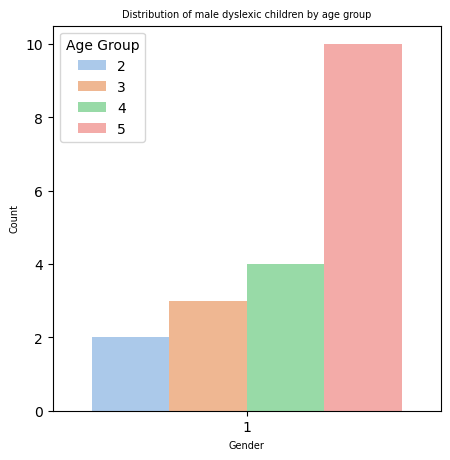

In [122]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_diskl,x='Pol',hue='Uzrasna grupa',palette='pastel')
plt.legend(title='Age Group') 
plt.xlabel('Gender',fontsize=7)
plt.ylabel('Count',fontsize=7)
plt.title('Distribution of male dyslexic children by age group',fontsize=7)

Text(0.5, 1.0, 'Distribution of male non-dyslexic children by age group')

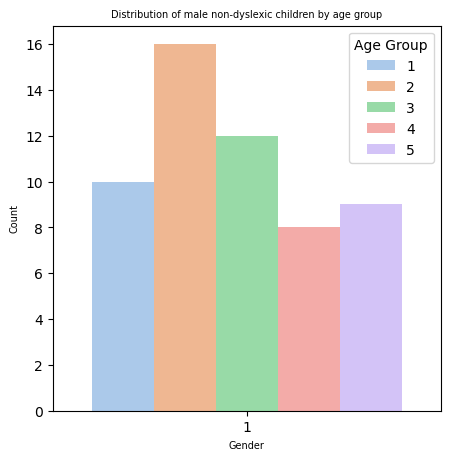

In [123]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Pol',hue='Uzrasna grupa',palette='pastel')
plt.legend(title='Age Group') 
plt.xlabel('Gender',fontsize=7)
plt.ylabel('Count',fontsize=7)
plt.title('Distribution of male non-dyslexic children by age group',fontsize=7)

In [124]:
df['Uzrasna grupa'].value_counts()

Uzrasna grupa
2    19
3    13
5    11
1    10
4     8
Name: count, dtype: int64

In [125]:
df_diskl['Uzrasna grupa'].value_counts()

Uzrasna grupa
5    13
3     7
4     6
2     4
Name: count, dtype: int64

We are interested in distribution of age groups of male children with and without dyslexia.

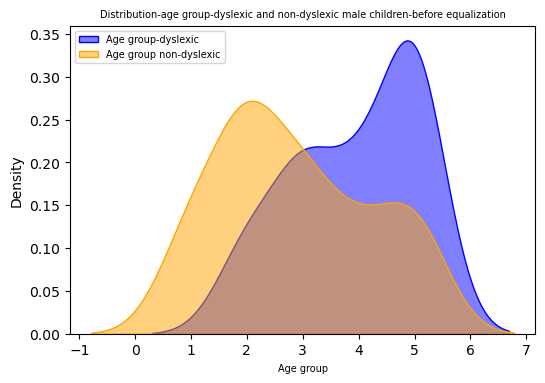

In [126]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_diskl['Uzrasna grupa'], label='Age group-dyslexic', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=df['Uzrasna grupa'], label='Age group non-dyslexic', fill=True, color='orange', alpha=0.5)
plt.title('Distribution-age group-dyslexic and non-dyslexic male children-before equalization',fontsize=7)
plt.xlabel('Age group',fontsize=7)
plt.legend(loc='upper left',fontsize=7)
plt.savefig('Distribution-age group-dyslexic and non-dyslexic male children-before equalization.png', dpi=150, bbox_inches='tight')
plt.show()

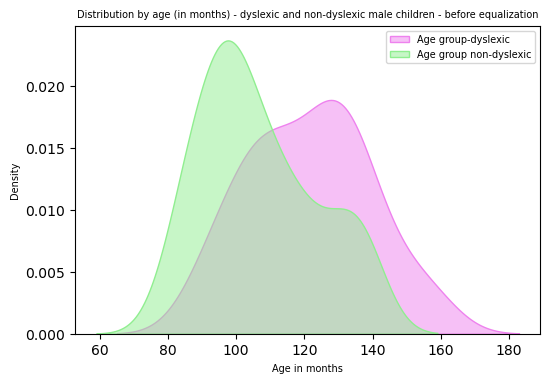

In [127]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_diskl['Uzrast (u mesecima)'], label='Age group-dyslexic', fill=True, color='violet', alpha=0.5)
sns.kdeplot(data=df['Uzrast (u mesecima)'], label='Age group non-dyslexic', fill=True, color='lightgreen', alpha=0.5)
plt.title('Distribution by age (in months) - dyslexic and non-dyslexic male children - before equalization',fontsize=7)
plt.xlabel('Age in months',fontsize=7)
plt.ylabel('Density',fontsize=7)
plt.legend(loc='upper right',fontsize=7)
plt.savefig('Distribution by age (in months) - dyslexic and non-dyslexic male children - before equalization.png', dpi=150, bbox_inches='tight')
plt.show()

We see that both distributions tend to be normal.

Age groups are divided on a scale between 1 to 5. As there are 5 age groups in a sample of non-dyslexic children and younger groups were more represented (age group 1 is only represented in the sample of  non-dyslexic children while it is absent in the sample of dyslexic children  and age group 2 is significantly more represented in the sample of non-dyslexic children while in the sample of dyslexic children is represented in small number) and as the number of dyslexic children is more frequent in age groups 4 and 5, in order to make two sample more uniform we excluded groups 1 and 2 from the sample of non-dyslexic male children.

In [128]:
df_ujednacen = df[~df['Uzrasna grupa'].isin([1,2])]

In [129]:
df_ujednacen.head()

,Pol,Uzrast (u mesecima),Uzrasna grupa,Razred,Škola,Vreme (s),Broj grešaka,Korišćenje papira,Skor,At Risk Index,...,11.1,12.1,13,14,15,16,Skor.10,At Risk Index.12,ARQ,Diagnosis
ID 137,,,,,,,,,,,,,,,,,,,,,
ID 334,1,132,5,5,5,35,0,0,35,2,...,1,1,1,0,1,1,15,1,0.09,1
ID 355,1,123,4,4,1,28,0,0,28,1,...,1,1,1,0,1,1,15,2,0.09,1
ID 363,1,129,5,4,1,34,0,0,34,2,...,1,1,1,0,1,1,14,2,0.18,1
ID 437,1,107,3,3,1,45,0,0,45,2,...,1,1,1,1,1,1,16,1,0.18,1
ID 445,1,114,4,3,1,26,0,0,26,1,...,0,1,1,1,1,1,15,2,0.18,1


In [130]:
df_ujednacen['Uzrasna grupa'].value_counts()

Uzrasna grupa
3    13
5    11
4     8
Name: count, dtype: int64

In [131]:
df_ujednacen['Uzrasna grupa'].count()

32

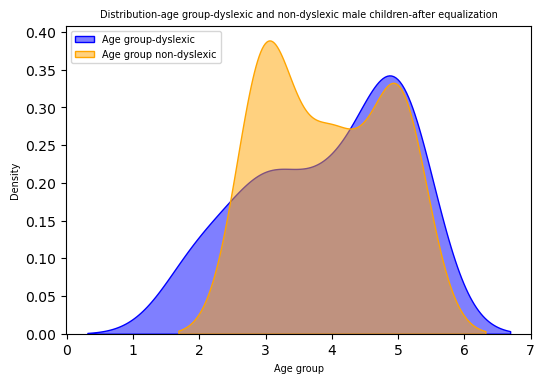

In [132]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_diskl['Uzrasna grupa'], label='Age group-dyslexic', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=df_ujednacen['Uzrasna grupa'], label='Age group non-dyslexic', fill=True, color='orange', alpha=0.5)
plt.title('Distribution-age group-dyslexic and non-dyslexic male children-after equalization',fontsize=7)
plt.xlabel('Age group',fontsize=7)
plt.ylabel('Density',fontsize=7)
plt.legend(loc='upper left',fontsize=7)
plt.savefig('Distribution-age group-dyslexic and non-dyslexic male children-after equalization.png', dpi=150, bbox_inches='tight')
plt.show()

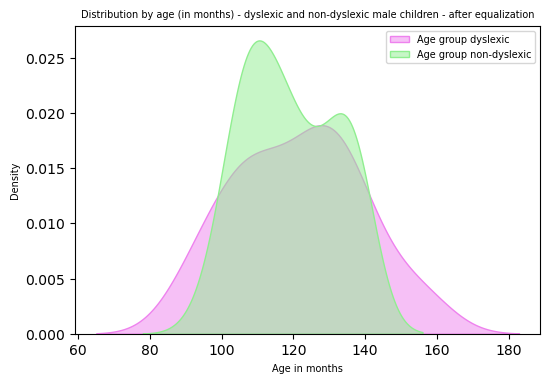

In [133]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_diskl['Uzrast (u mesecima)'], label='Age group dyslexic', fill=True, color='violet', alpha=0.5)
sns.kdeplot(data=df_ujednacen['Uzrast (u mesecima)'], label='Age group non-dyslexic', fill=True, color='lightgreen', alpha=0.5)
plt.title('Distribution by age (in months) - dyslexic and non-dyslexic male children - after equalization',fontsize=7)
plt.xlabel('Age in months',fontsize=7)
plt.legend(loc='upper right',fontsize=7)
plt.ylabel('Density',fontsize=7)
plt.savefig('Distribution by age (in months) - dyslexic and non-dyslexic male children - after equalization.png',dpi=150, bbox_inches='tight')
plt.show()

After uniforming two samples we see that means of two samples are more similar. Now we will perform statystical
analysis on uniformed samples.

In [134]:
import numpy as np
from scipy.stats import ttest_ind, ks_2samp, mannwhitneyu

# Example data

data3 = df_diskl['ARQ']
data4 = df_ujednacen['ARQ']

# Kolmogorov-Smirnov Test
ks_stat1, ks_p_value1 = ks_2samp(data3, data4)
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat1}, P-value={ks_p_value1}")

# Mann-Whitney U Test
u_stat1, u_p_value1 = mannwhitneyu(data3, data4, alternative='two-sided')
print(f"Mann-Whitney U Test: Statistic={u_stat1}, P-value={u_p_value1}")

# T-test
t_stat1, t_p_value1 = ttest_ind(data3, data4, equal_var=False)  # Use equal_var=False for Welch's t-test
print(f"T-test: Statistic={t_stat1}, P-value={t_p_value1}")

# Calculate Cohen's d
mean3, mean4 = np.mean(data3), np.mean(data4)
std3, std4 = np.std(data3, ddof=1), np.std(data4, ddof=1)
pooled_std1 = np.sqrt(((len(data3) - 1) * std3**2 + (len(data4) - 1) * std4**2) / (len(data3) + len(data4) - 2))
cohens_d1 = (mean3 - mean4) / pooled_std1

print(f"Cohen's d: {cohens_d}")

Kolmogorov-Smirnov Test: Statistic=1.0, P-value=4.435733479906817e-18
Mann-Whitney U Test: Statistic=960.0, P-value=8.915430055332612e-12
T-test: Statistic=14.90075931250458, P-value=1.896957634838687e-15
Cohen's d: 4.714730550546645


A comparative analysis was conducted to evaluate the performance of boys with dyslexia (n = 30) and without dyslexia (n = 32) on the DSTJ test using the ARQ score. A t-test revealed a statistically significant difference between the two groups (t = 14.90, p < 0.001). The effect size, measured by Cohen's d, was exceptionally large (d = 4.71), indicating a substantial difference in performance.


We also wanted to see distribution of ARQ in two sample groups (dyslexic and non-dyslexic male children group).

In [135]:
df_ujednacen['ARQ'].value_counts()

ARQ
0.225    16
0.270     7
0.180     4
0.090     3
0.360     1
0.450     1
Name: count, dtype: int64

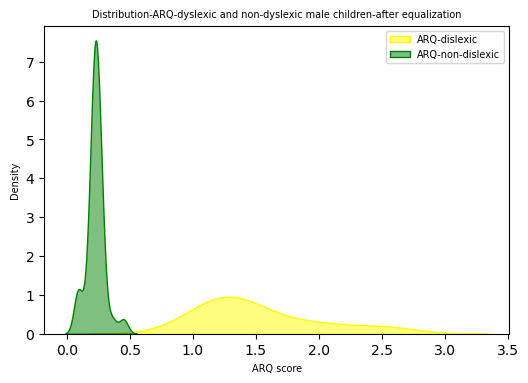

In [136]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_diskl['ARQ'], label='ARQ-dislexic', fill=True, color='yellow', alpha=0.5)
sns.kdeplot(data=df_ujednacen['ARQ'], label='ARQ-non-dislexic', fill=True, color='green', alpha=0.5)
plt.title('Distribution-ARQ-dyslexic and non-dyslexic male children-after equalization',fontsize=7)
plt.xlabel('ARQ score',fontsize=7)
plt.ylabel('Density',fontsize=7)
plt.legend(loc='upper right',fontsize=7)
plt.savefig('Distribution-ARQ-dyslexic and non-dyslexic male children-after equalization.png', dpi=150, bbox_inches='tight')
plt.show()

The graph shows us that the achievements of male children without dyslexia range from 0.0-0.5 (which tell us they have no difficulties), while dyslexic children have different achievements on arq sqore meaning that existing external diagnosis of dyslexia comprehend heterogenous group of children with various reading difficulties.